## Videha AI: Single Table Demo

In [1]:
import os,sys,torch
import pandas as pd

In [2]:
from videha.synthesizers import TwinSynthesizer
from videha.metrics import *
from videha.metrics.reports import *
from videha.metrics import compute_metrics
from videha.metrics.single_table import SingleTableMetric
from videha.metrics.single_table import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

##### Check if GPU is available

In [4]:
torch.cuda.is_available()

True

##### Read data and define numeric and discrete columns

In [5]:
data = pd.read_csv("F:/Users/Kaggle/Videha/examples/csv/adult.csv")

In [6]:
numeric_features = ['capital-gain','capital-loss','hours-per-week']

discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

## Normal API: Non Privately Differentable Synthesizer

In [7]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [8]:
synth.fit(data=data,epochs=2,discrete_columns=discrete_columns)

Epoch: [0]  [  0/161]  eta: 0:00:23  loss_g: 1.9347 (1.9347)  loss_d: -0.0114 (-0.0114)  loss: 1.9233 (1.9233)  time: 0.1471  data: 0.0000  max mem: 0
Epoch: [0]  [ 50/161]  eta: 0:00:06  loss_g: 1.6263 (1.8173)  loss_d: -0.6860 (-0.5877)  loss: 0.9306 (1.2296)  time: 0.0613  data: 0.0000  max mem: 0
Epoch: [0]  [100/161]  eta: 0:00:03  loss_g: 1.3228 (1.6858)  loss_d: -0.0887 (-0.4441)  loss: 1.2681 (1.2417)  time: 0.0615  data: 0.0000  max mem: 0
Epoch: [0]  [150/161]  eta: 0:00:00  loss_g: 0.8804 (1.4718)  loss_d: 0.2009 (-0.2486)  loss: 1.1126 (1.2232)  time: 0.0555  data: 0.0000  max mem: 0
Epoch: [0]  [161/161]  eta: 0:00:00  loss_g: 0.9245 (1.4337)  loss_d: 0.1915 (-0.2205)  loss: 1.1111 (1.2131)  time: 0.0556  data: 0.0000  max mem: 0
Epoch: [0] Total time: 0:00:09
Epoch: [1]  [  0/161]  eta: 0:00:08  loss_g: 0.9281 (0.9281)  loss_d: 0.0126 (0.0126)  loss: 0.9406 (0.9406)  time: 0.0549  data: 0.0000  max mem: 0
Epoch: [1]  [ 50/161]  eta: 0:00:06  loss_g: 0.7974 (0.9089)  loss_

In [9]:
sample = synth.sample(1000)

In [10]:
metrics = SingleTableMetric.get_subclasses()

#### Report with privacy metrics

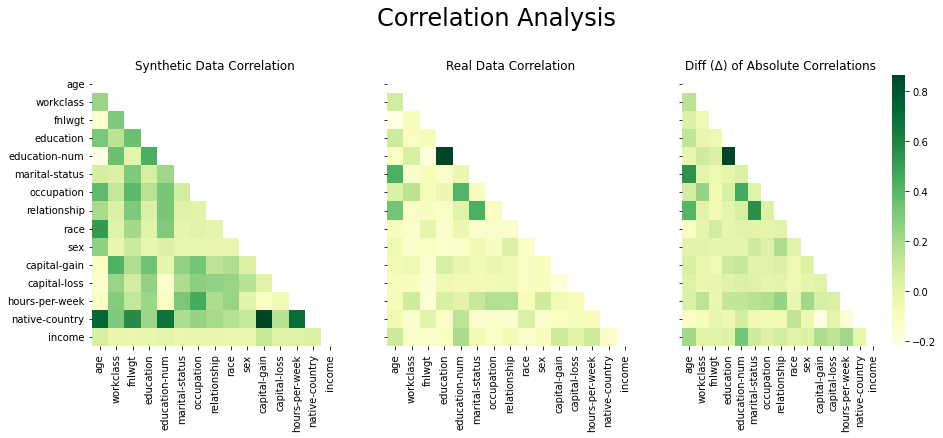

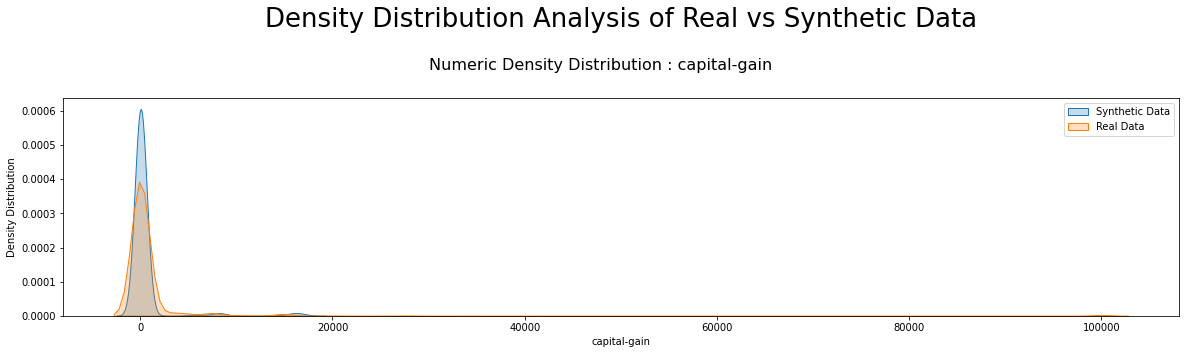

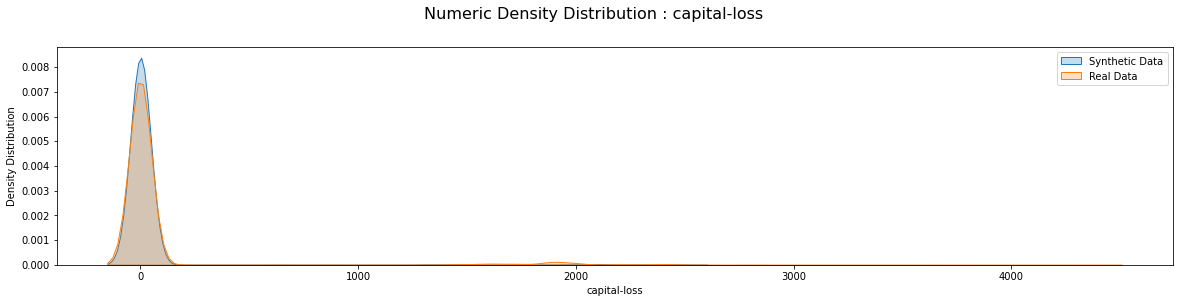

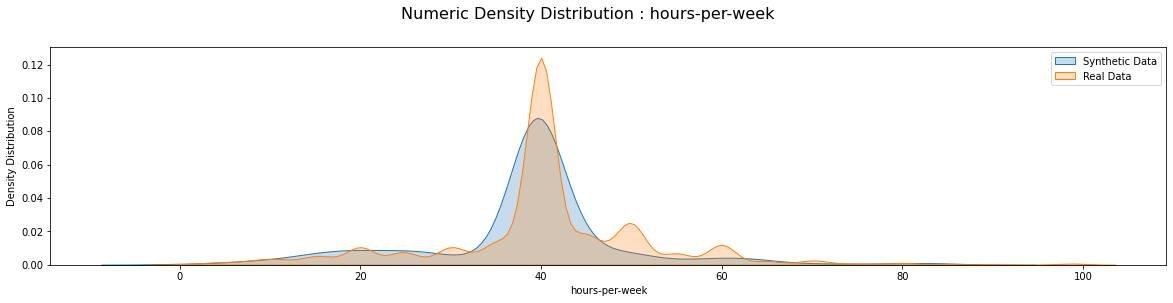

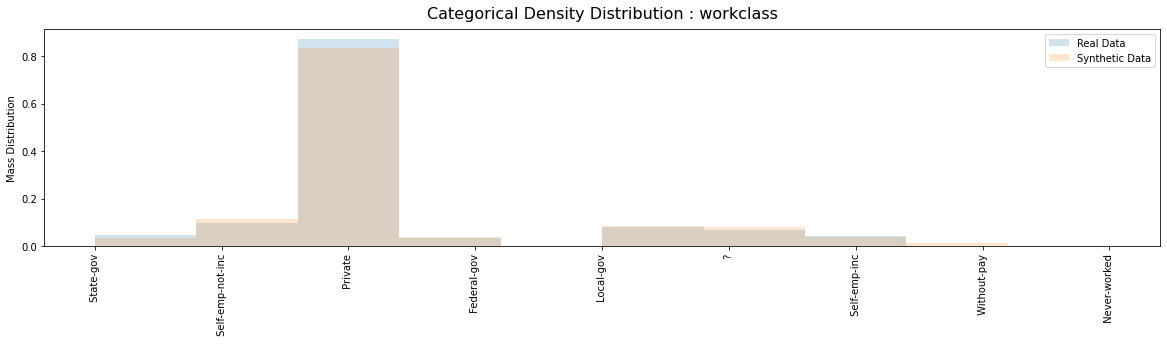

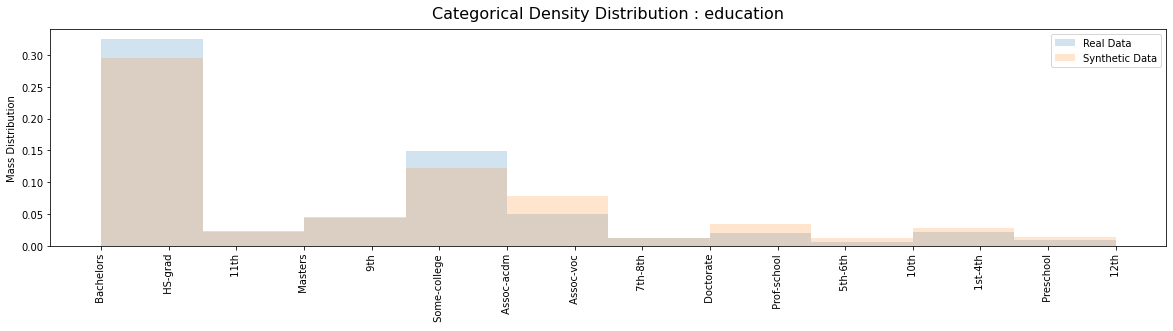

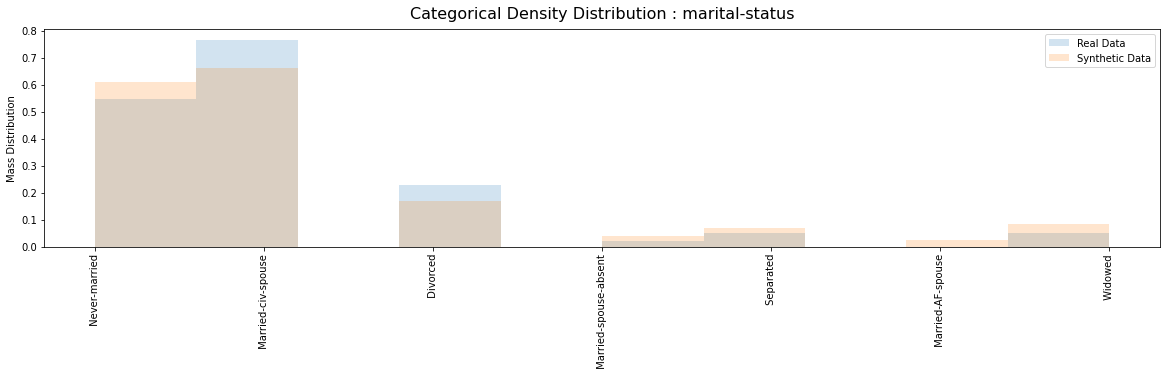

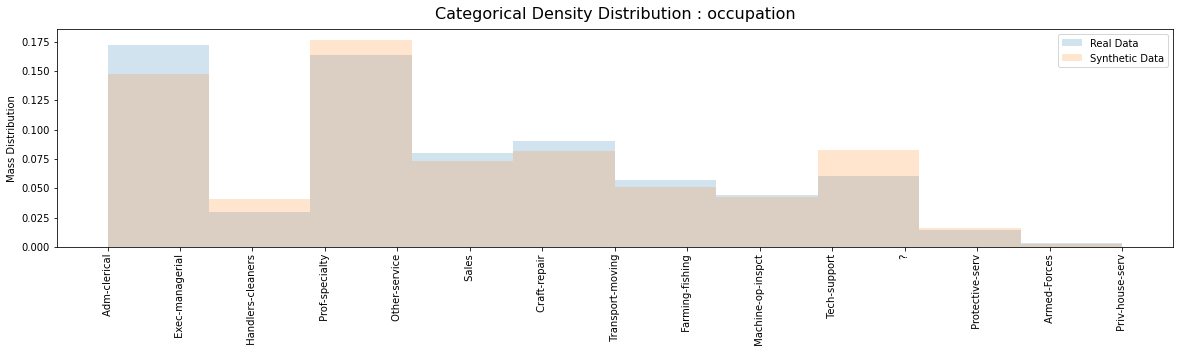

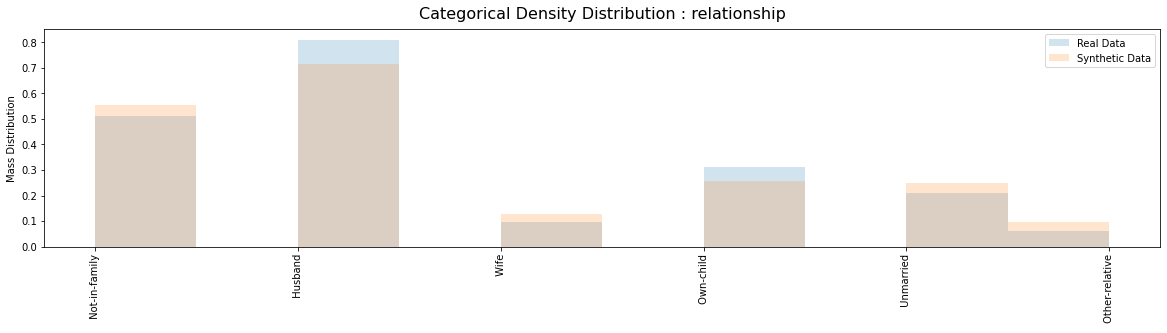

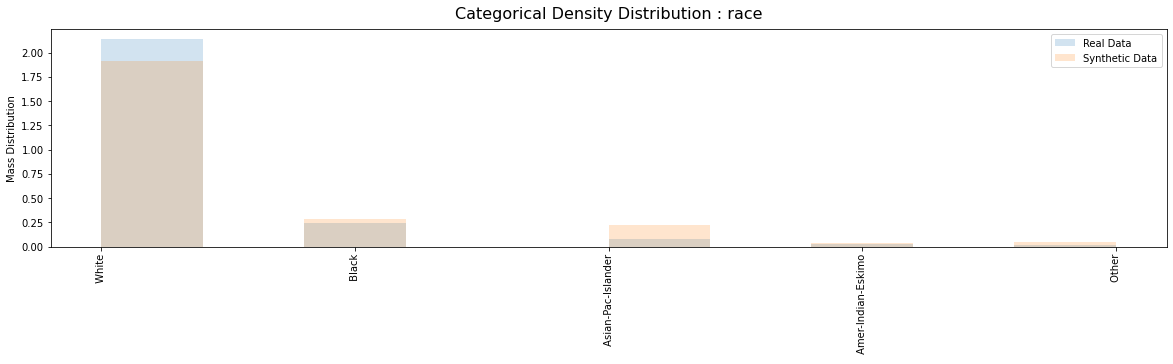

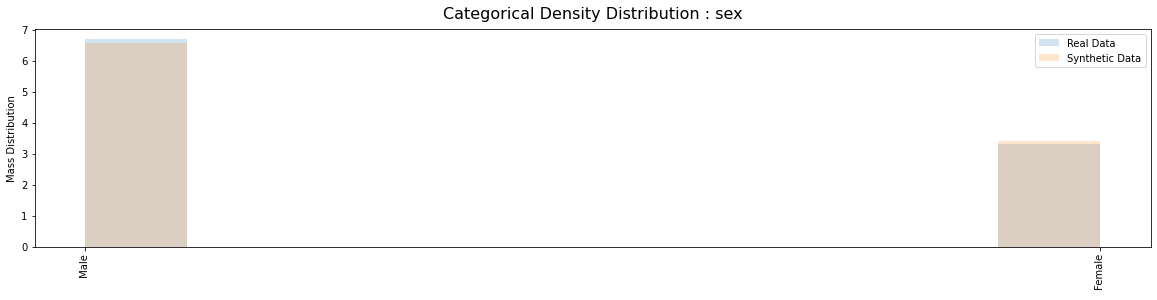

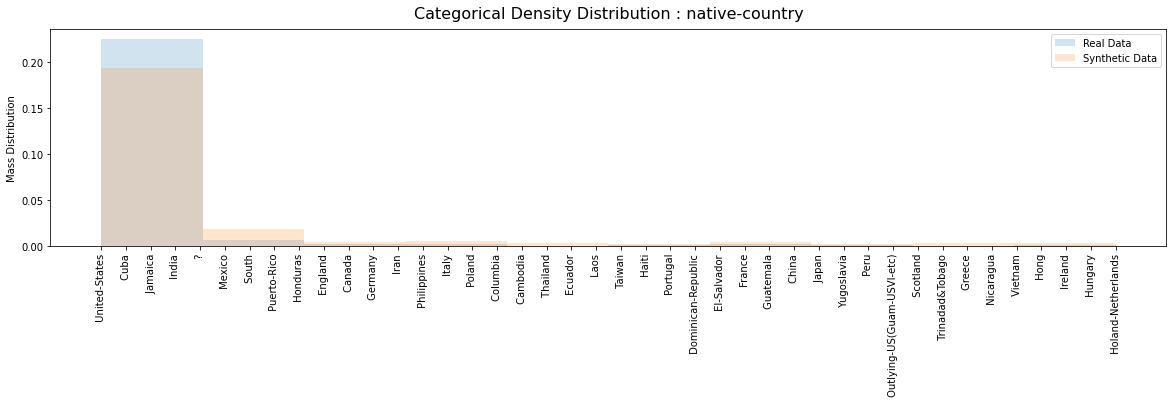

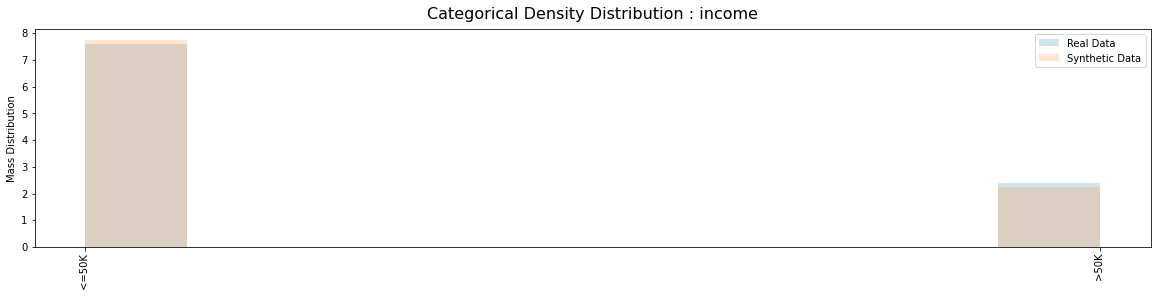

In [11]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy metrics

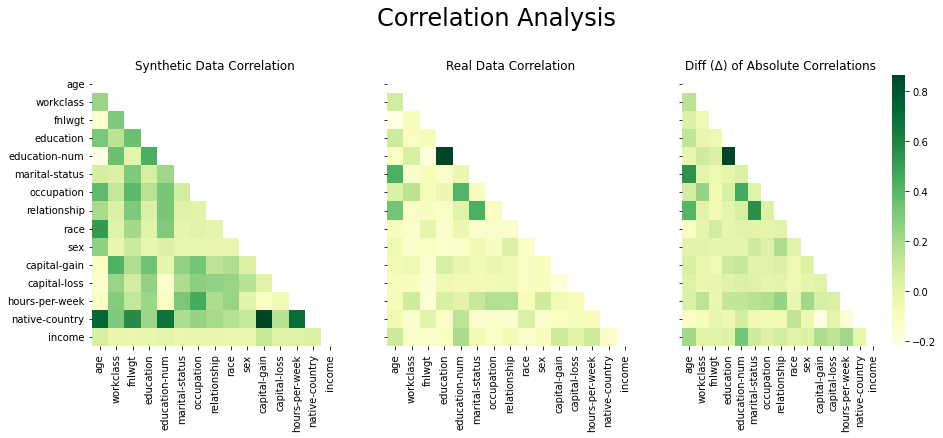

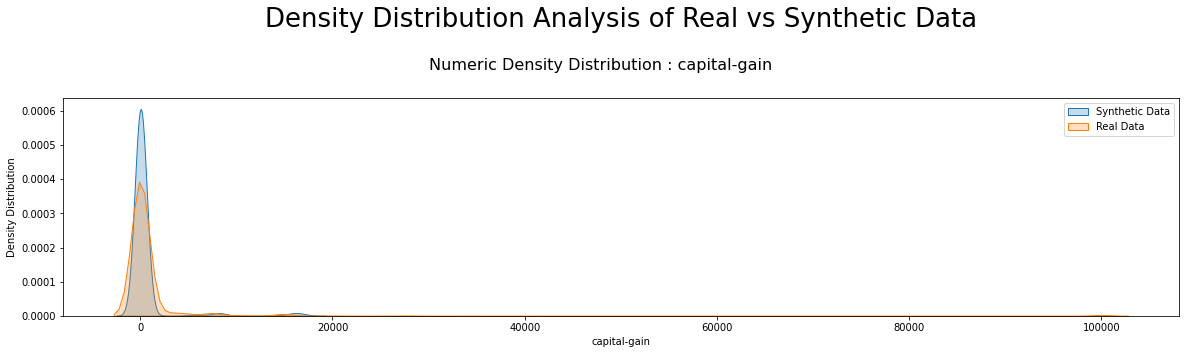

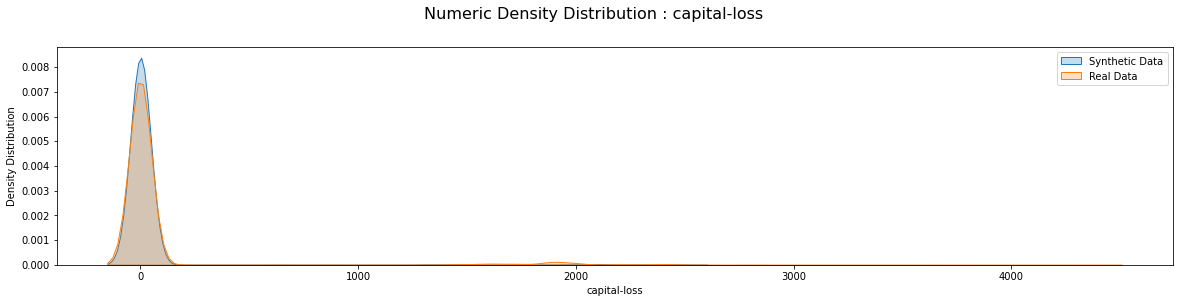

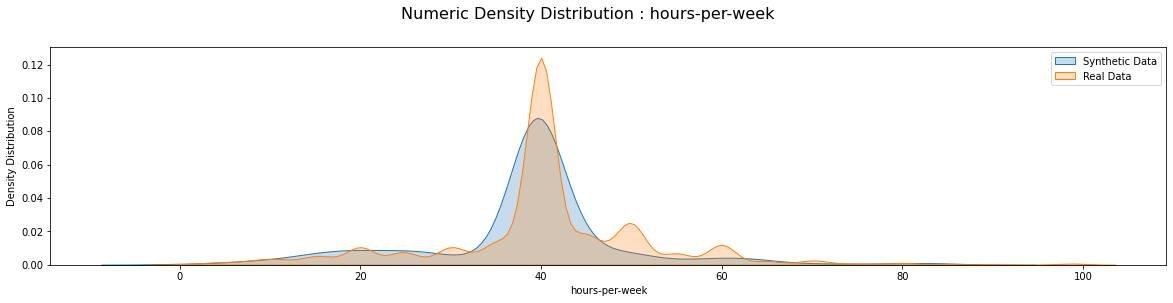

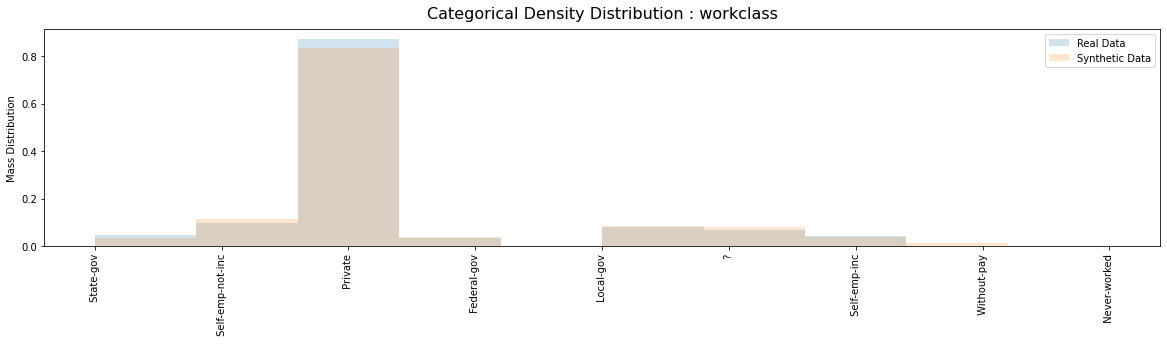

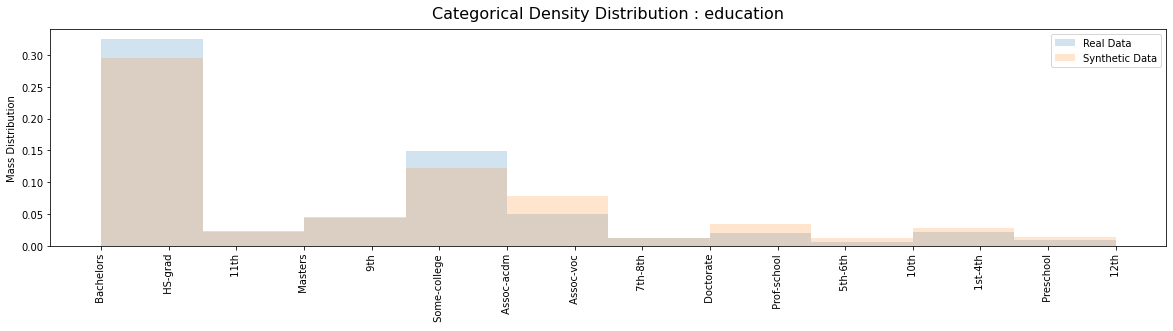

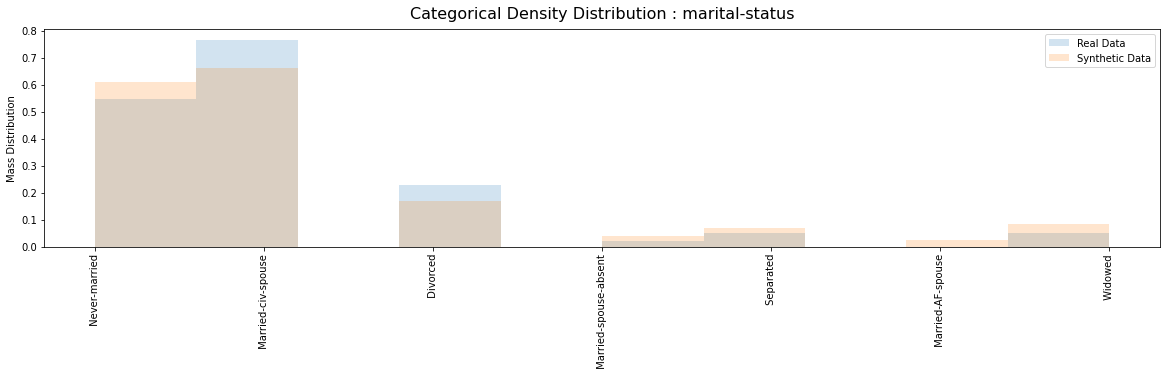

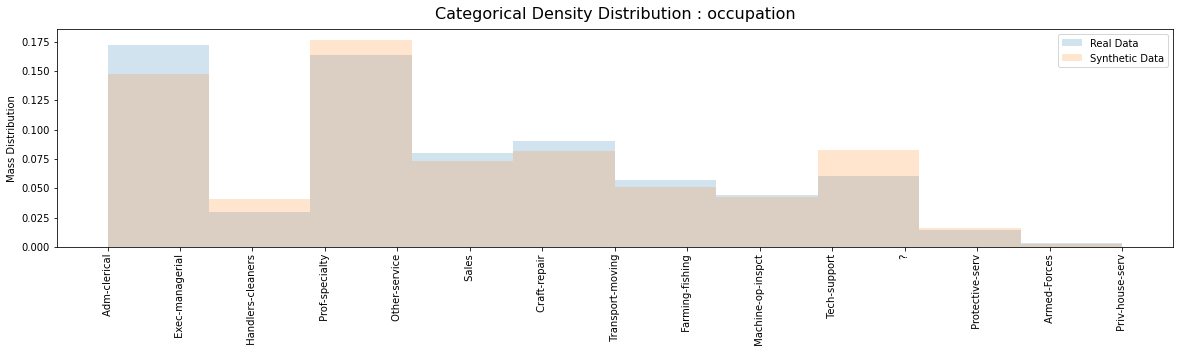

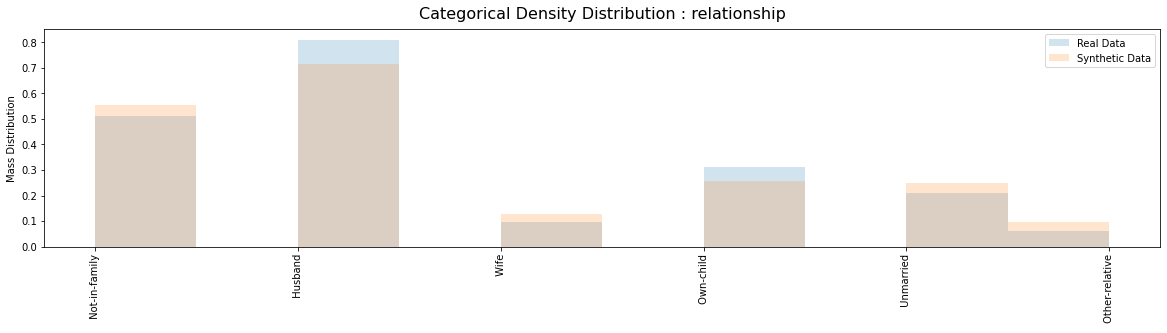

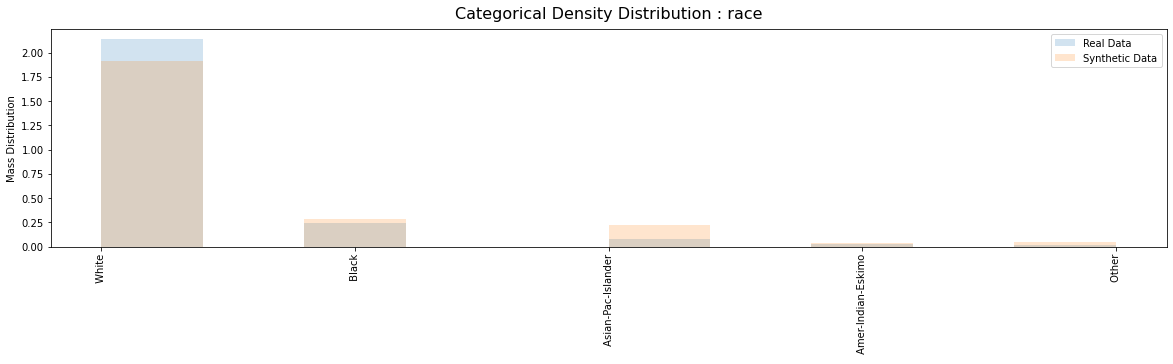

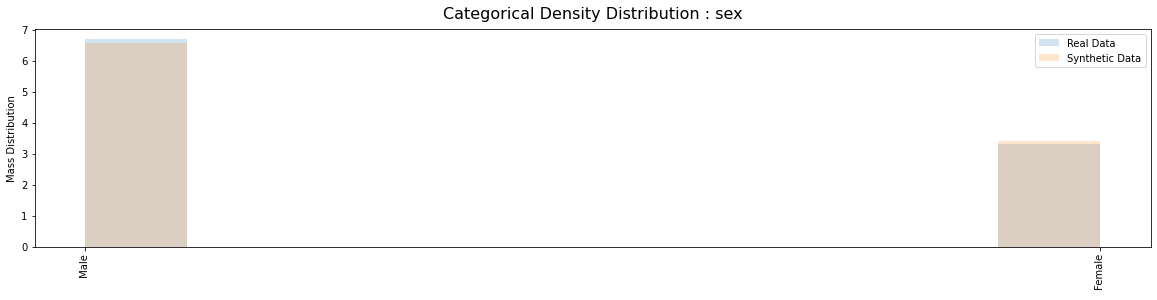

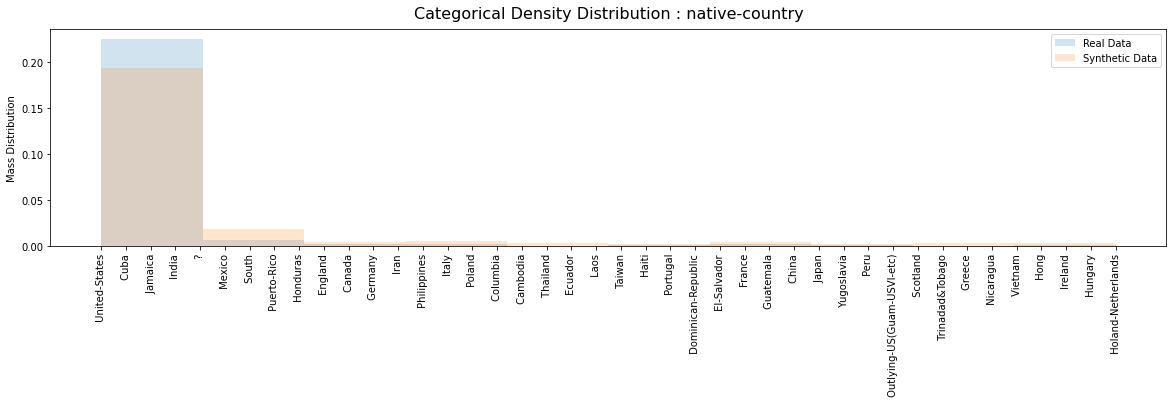

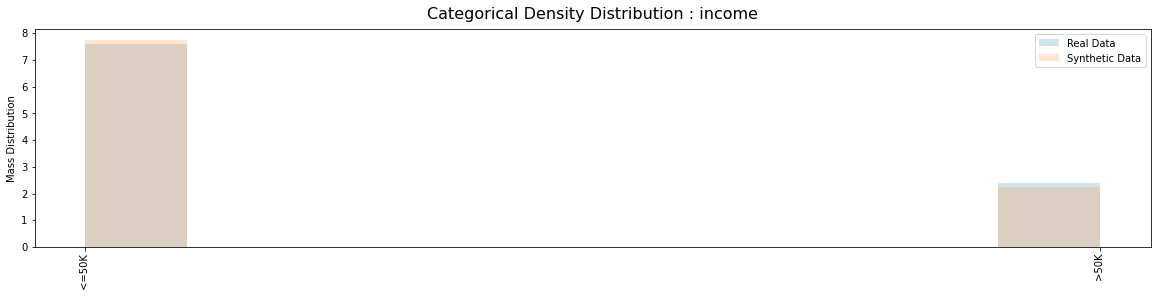

In [12]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy and ML efficacy metrics

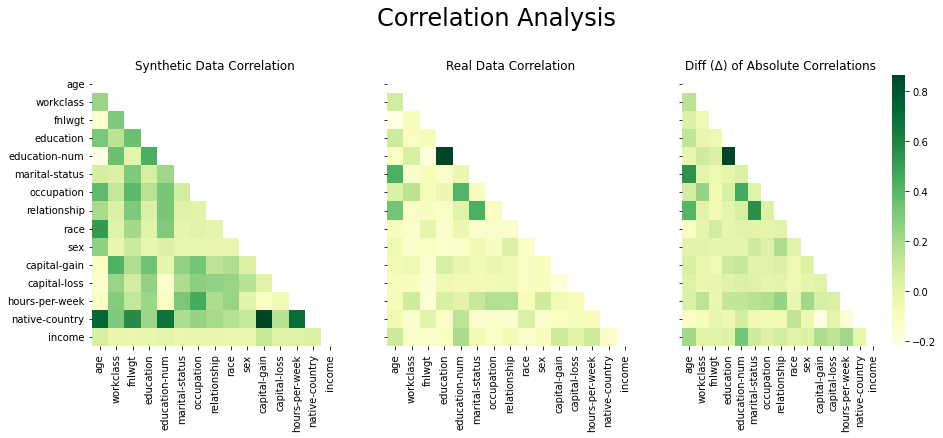

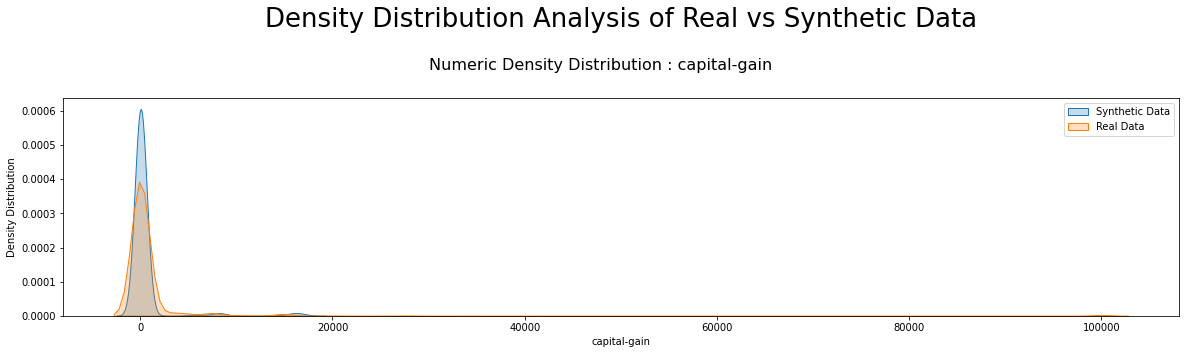

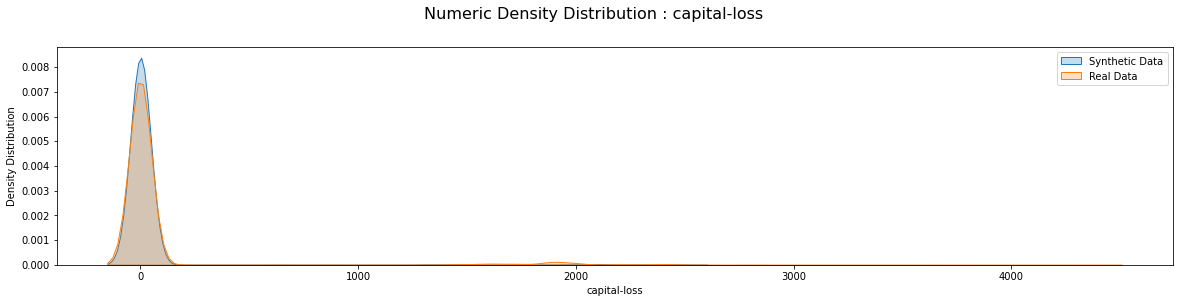

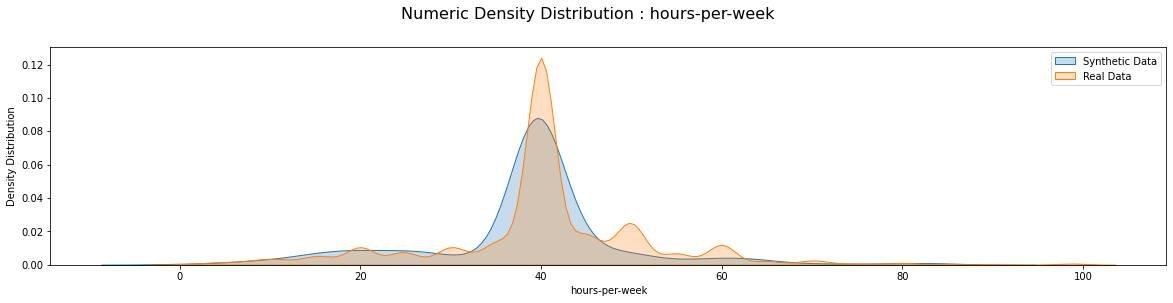

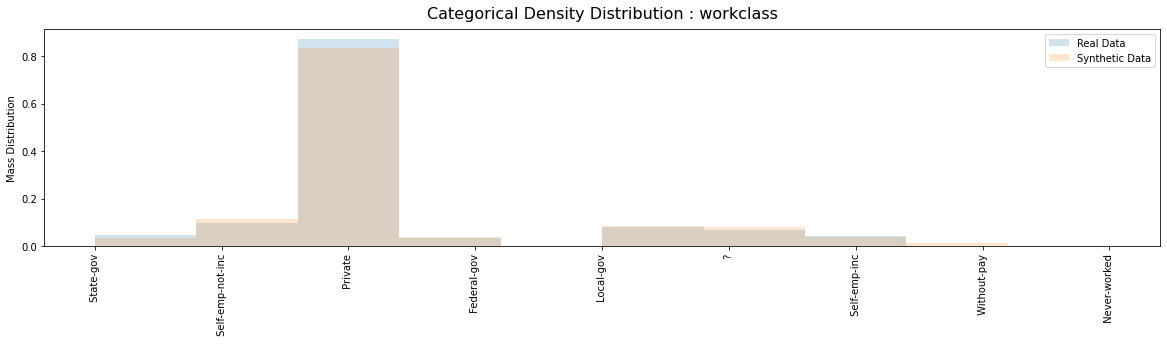

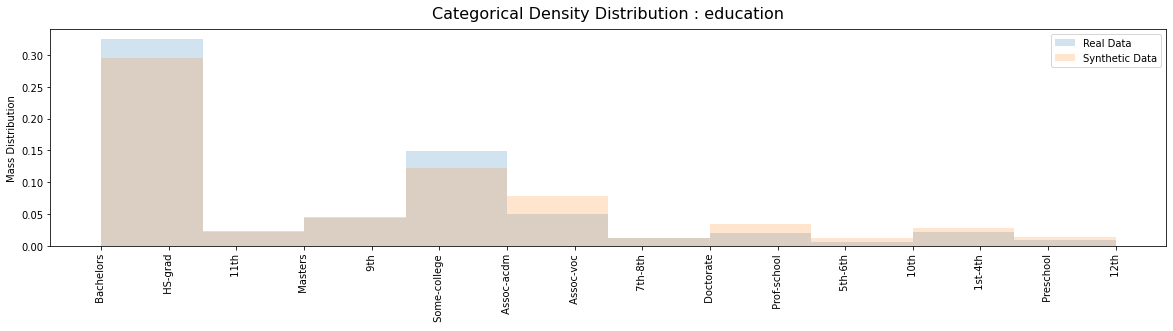

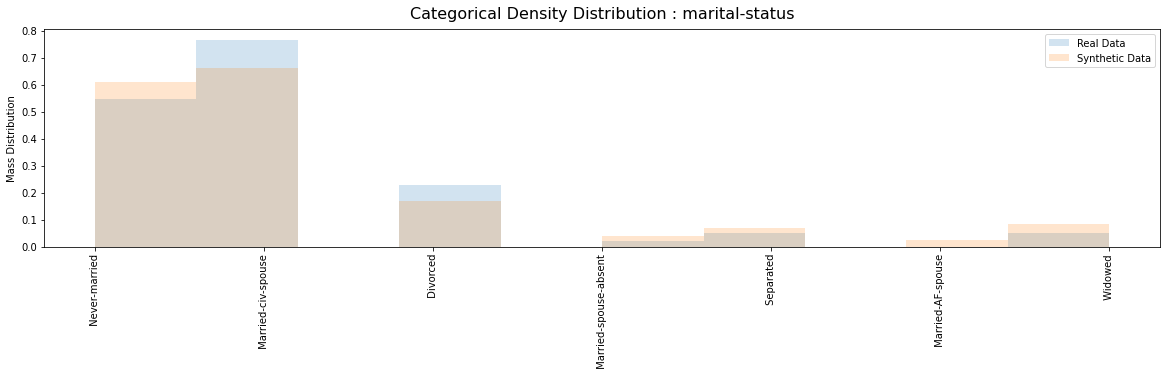

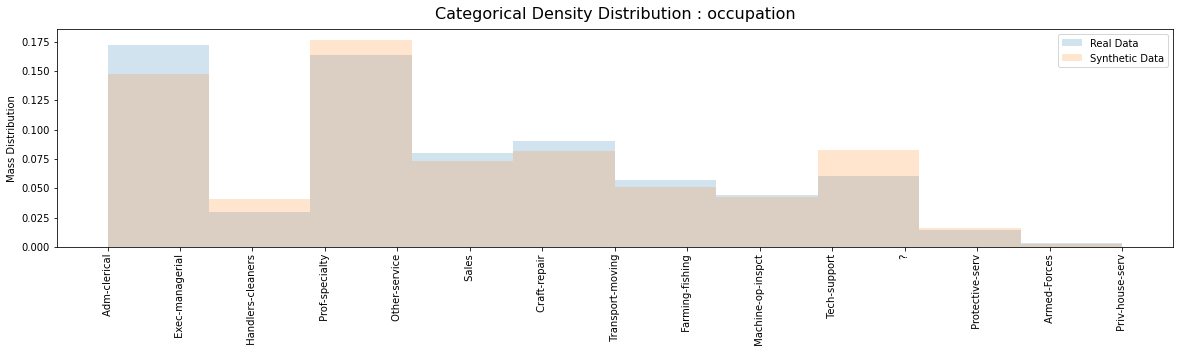

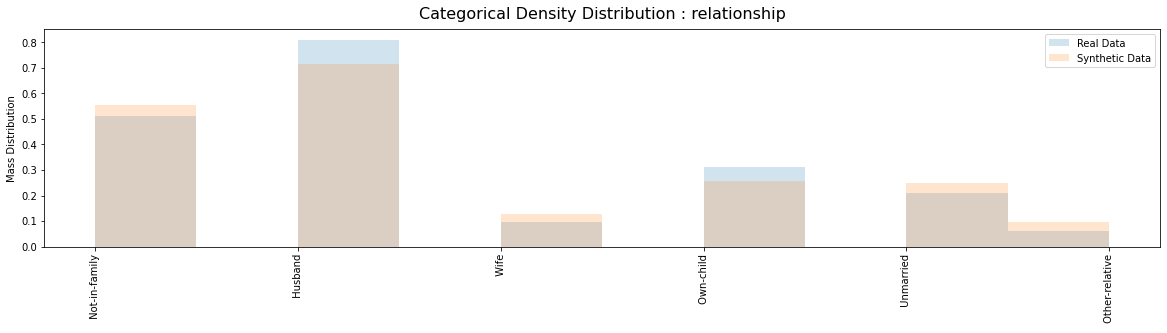

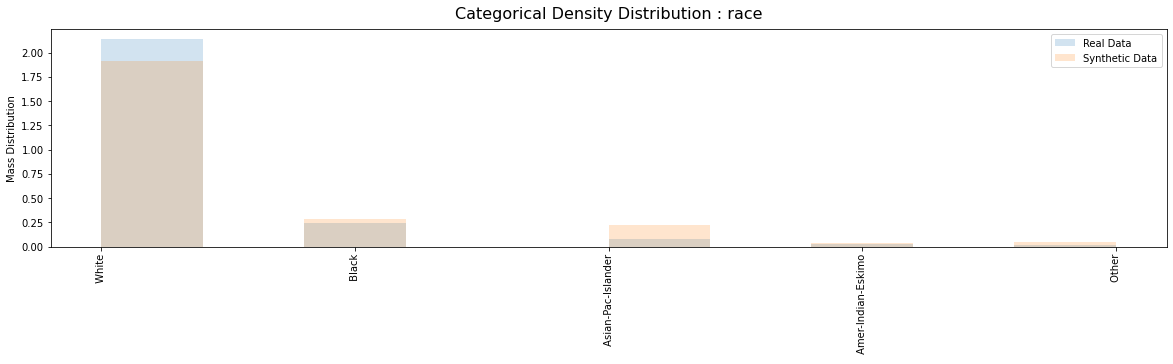

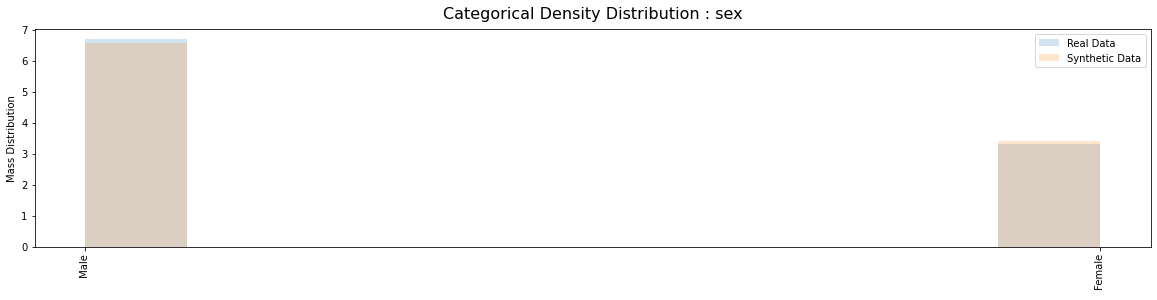

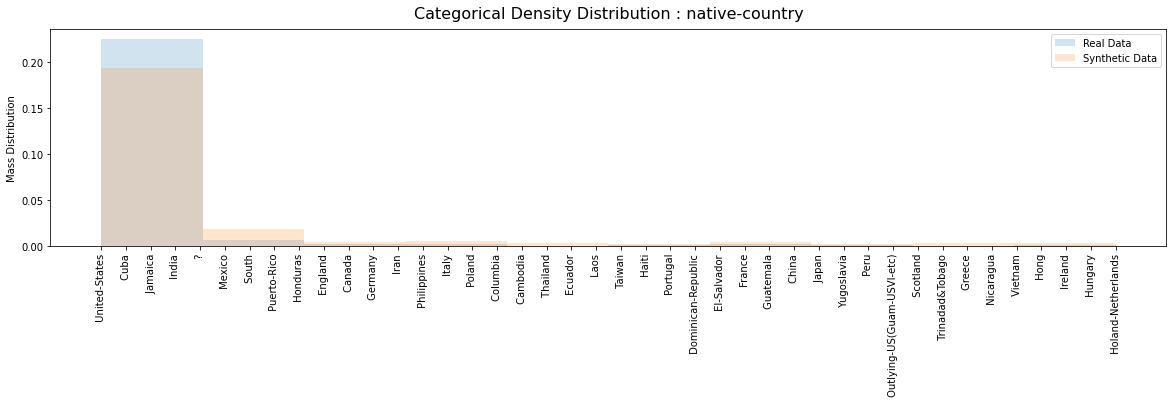

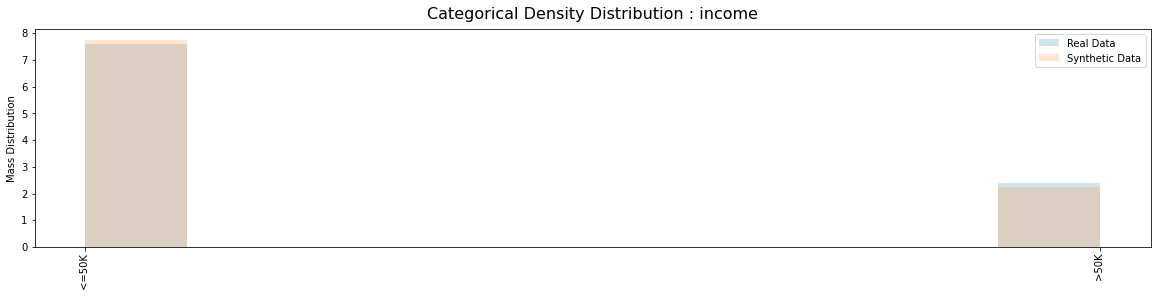

In [13]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Optionally save model to disk and use generator to generate samples indefinitely

In [14]:
# synth.save('NormalAPI.pth')

#### 

### Fin ###